<a href="https://colab.research.google.com/github/TingLin-Hsiao/special-octo-spork/blob/main/%E6%88%91%E7%9A%84%E9%B3%B6%E5%B0%BE%E8%8A%B1%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#載入dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

#建立Training dataset＆Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2 )#分20%當成testing dataset  

#用sklearn裡面的標準化工具做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#因為三種花分類沒有數值大小的關係
#因此需要將y_train轉為one-hot encoding
num_classes =3
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

#建模型
model = models.Sequential([
   layers.Dense(units=20, input_dim=4, activation='relu'), #因為有四種數值 所以是4
   layers.Dense(units=10, activation='relu'),   
   layers.Dense(units=3, activation='softmax'),  #因為分三類，所以是3
  ])
model.summary()

#設定HyperParameters
model.compile(loss='categorical_crossentropy',    #選擇loss function, 因為分類種類和大小無關, 因此選"categorical_crossentropy" 
      optimizer='adam',            #選擇優化器
      metrics=['categorical_accuracy'])
            
#開始training
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=100,      #train 100次
    verbose=1,
    validation_split=0.1  #取10%訓練資料為驗證資料
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                100       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 59ms/step - loss: 0.8125 - categorical_accuracy: 0.6759 - val_loss: 0.8066 - val_categorical_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7864 - categorical_accuracy: 0.6759 - val_loss: 0.7804 - val_categorical_accuracy:

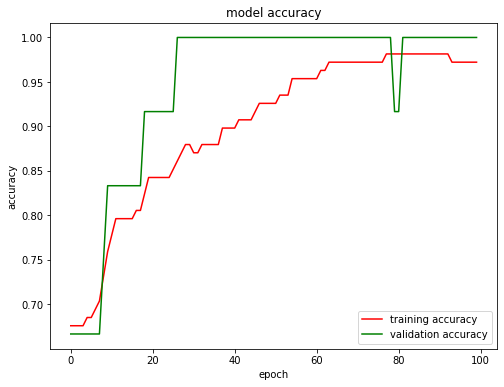

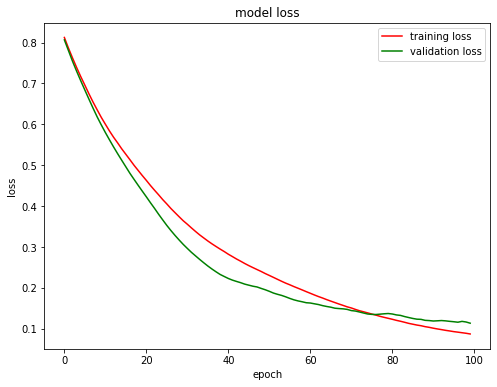

In [ ]:
import matplotlib.pyplot as plt
#畫accuracy的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['categorical_accuracy'], 'r', label='training accuracy')    #紅色的線 training accuracy
plt.plot(history.history['val_categorical_accuracy'], 'g', label='validation accuracy') #綠色的線 validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend() 
plt.show()

#畫loss的圖
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'r', label='training loss')      #紅色的線 training loss     
plt.plot(history.history['val_loss'], 'g', label='validation loss')   #綠色的線 validation loss  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() 
plt.show()



In [ ]:
#開始testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test loss"+str(test_loss))
print("test accuracy"+str(test_accuracy))


1/1 [==============================] - 0s 21ms/step - loss: 0.0771 - categorical_accuracy: 0.9667
test loss0.07712643593549728
test accuracy0.9666666388511658
